# How to apply Memory-Based Collaborative Filtering

A basic roadmap of memory-based collaborative filtering, using Python.

### 1. Load the libraries/modules

In [49]:
import numpy as np
import pandas as pd
# import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 2. Load the dataset

In [2]:
url = "http://files.grouplens.org/datasets/movielens/ml-100k/u.data"
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv(url, sep='\t', names=column_names)

ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### 3. Transform the dataset into a DataFrame

In [3]:
print(type(ratings))

<class 'pandas.core.frame.DataFrame'>


### 4. Exploratory Data Analysis

In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
ratings.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


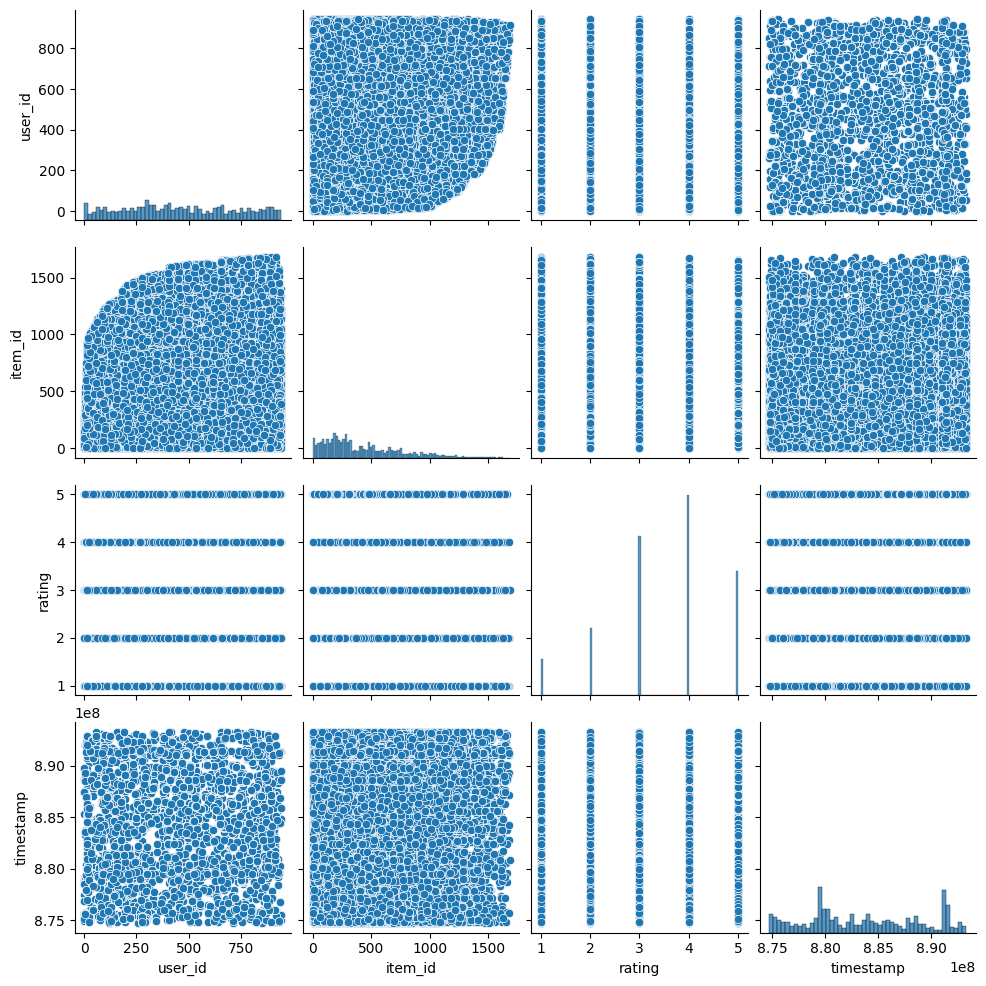

In [6]:
sns.pairplot(ratings)

<Axes: xlabel='rating', ylabel='count'>

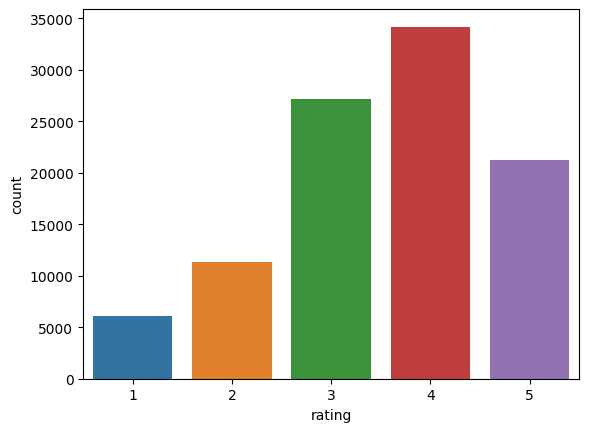

In [7]:
sns.countplot(data=ratings, x='rating')

### 5. Split the data

In [11]:
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=101)

print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")

Training data size: 80000
Testing data size: 20000


### 6. Create interaction matrices

In [17]:
# user-item
n_users = ratings.user_id.unique().shape[0]
n_items = ratings.item_id.unique().shape[0]

def create_interaction_matrix(df, n_users, n_items):
    interaction_matrix = np.zeros((n_users, n_items))
    for line in df.itertuples():
        interaction_matrix[line[1] - 1, line[2] - 1] = line[3]
    return interaction_matrix

train_data_user_item_matrix = create_interaction_matrix(train_data, n_users, n_items)
test_data_user_item_matrix = create_interaction_matrix(test_data, n_users, n_items)

In [65]:
train_data_user_item_matrix

array([[5., 3., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
test_data_user_item_matrix

array([[0., 0., 4., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [20]:
# item-item
n_users = ratings.user_id.unique().shape[0]
n_items = ratings.item_id.unique().shape[0]

def create_item_item_interaction_matrix(df, n_users, n_items):
    interaction_matrix = np.zeros((n_items, n_users))
    for line in df.itertuples():
        interaction_matrix[line[2] - 1, line[1] - 1] = line[3]
    return interaction_matrix

train_data_item_item_matrix = create_item_item_interaction_matrix(train_data, n_users, n_items)
test_data_item_item_matrix = create_item_item_interaction_matrix(test_data, n_users, n_items)

In [38]:
train_data_item_item_matrix

array([[5., 4., 0., ..., 5., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
test_data_item_item_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 5.],
       [4., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 7. Calculate similarity matrices

In [24]:
user_similarity_train = pairwise_distances(train_data_user_item_matrix, metric='cosine')
user_similarity_test = pairwise_distances(test_data_user_item_matrix, metric='cosine')

# could also use other metrics, such as 'euclidean' and 'manhattan'

In [32]:
user_similarity_train

array([[0.        , 0.87935258, 0.96328985, ..., 0.91477155, 0.88737804,
        0.66991731],
       [0.87935258, 0.        , 0.90470469, ..., 0.92097335, 0.86958734,
        0.90145119],
       [0.96328985, 0.90470469, 0.        , ..., 0.9020987 , 0.8577717 ,
        0.98157191],
       ...,
       [0.91477155, 0.92097335, 0.9020987 , ..., 0.        , 0.90266484,
        0.92963876],
       [0.88737804, 0.86958734, 0.8577717 , ..., 0.90266484, 0.        ,
        0.85503092],
       [0.66991731, 0.90145119, 0.98157191, ..., 0.92963876, 0.85503092,
        0.        ]])

In [33]:
user_similarity_test

array([[0.        , 0.95932236, 1.        , ..., 0.91880377, 1.        ,
        0.97314784],
       [0.95932236, 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.91880377, 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.97314784, 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

In [25]:
item_similarity_train = pairwise_distances(train_data_item_item_matrix, metric='cosine')
item_similarity_test = pairwise_distances(test_data_item_item_matrix, metric='cosine')

In [34]:
item_similarity_train

array([[0.        , 0.69778121, 0.73139251, ..., 1.        , 1.        ,
        0.94807821],
       [0.69778121, 0.        , 0.79578597, ..., 1.        , 1.        ,
        1.        ],
       [0.73139251, 0.79578597, 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.94807821, 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

In [35]:
item_similarity_test

array([[0.        , 0.87934881, 0.9714012 , ..., 1.        , 0.88695332,
        1.        ],
       [0.87934881, 0.        , 0.86666667, ..., 1.        , 1.        ,
        1.        ],
       [0.9714012 , 0.86666667, 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.88695332, 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

### 8. Make predictions

In [40]:
def predict(interaction_matrix, similarity_matrix, type='user'):
    if type == 'user':
        mean_user_rating = interaction_matrix.mean(axis=1)
        ratings_diff = (interaction_matrix - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + np.dot(similarity_matrix, ratings_diff) / np.array([np.abs(similarity_matrix).sum(axis=1)]).T
    elif type == 'item':
        pred = np.dot(interaction_matrix, similarity_matrix) / np.array([np.abs(similarity_matrix).sum(axis=1)])
    else:
        raise ValueError("Invalid type. Allowed values are 'user' and 'item'.")
    return pred

In [41]:
user_based_train_pred = predict(train_data_user_item_matrix, user_similarity_train, type='user')
user_based_test_pred = predict(test_data_user_item_matrix, user_similarity_test, type='user')

In [45]:
user_based_test_pred

array([[ 0.40951648,  0.19958604,  0.15972005, ...,  0.09241518,
         0.09539069,  0.09241518],
       [ 0.31320006,  0.1057365 ,  0.067897  , ..., -0.00686235,
        -0.0038842 , -0.00686235],
       [ 0.29389444,  0.08050408,  0.04345927, ..., -0.03078807,
        -0.02756035, -0.03078807],
       ...,
       [ 0.28353611,  0.07724822,  0.03623298, ..., -0.03469486,
        -0.03140032, -0.03469486],
       [ 0.31771502,  0.1041265 ,  0.06883849, ..., -0.00518068,
        -0.00208414, -0.00518068],
       [ 0.34759708,  0.12617335,  0.10146232, ...,  0.02914863,
         0.03227743,  0.02914863]])

In [46]:
user_based_test_pred

array([[ 0.40951648,  0.19958604,  0.15972005, ...,  0.09241518,
         0.09539069,  0.09241518],
       [ 0.31320006,  0.1057365 ,  0.067897  , ..., -0.00686235,
        -0.0038842 , -0.00686235],
       [ 0.29389444,  0.08050408,  0.04345927, ..., -0.03078807,
        -0.02756035, -0.03078807],
       ...,
       [ 0.28353611,  0.07724822,  0.03623298, ..., -0.03469486,
        -0.03140032, -0.03469486],
       [ 0.31771502,  0.1041265 ,  0.06883849, ..., -0.00518068,
        -0.00208414, -0.00518068],
       [ 0.34759708,  0.12617335,  0.10146232, ...,  0.02914863,
         0.03227743,  0.02914863]])

In [44]:
item_based_train_pred = predict(train_data_user_item_matrix, item_similarity_train, type='item')
item_based_test_pred = predict(test_data_user_item_matrix, item_similarity_test, type='item')

In [47]:
item_based_train_pred

array([[0.36514479, 0.38494769, 0.41039138, ..., 0.45169202, 0.44854253,
        0.43671191],
       [0.0838295 , 0.0979819 , 0.09332954, ..., 0.09746554, 0.09934563,
        0.09982407],
       [0.07299607, 0.076985  , 0.07468526, ..., 0.07227492, 0.07614515,
        0.07684152],
       ...,
       [0.03019812, 0.03935775, 0.03789866, ..., 0.04361527, 0.04342653,
        0.04331176],
       [0.13353706, 0.14365658, 0.15375472, ..., 0.16109582, 0.16180845,
        0.16117043],
       [0.20957265, 0.21338932, 0.23508433, ..., 0.27050721, 0.26829268,
        0.26083147]])

In [48]:
item_based_test_pred

array([[0.13019932, 0.1316159 , 0.12335693, ..., 0.13563355, 0.13427715,
        0.13563355],
       [0.03586676, 0.03752894, 0.03693061, ..., 0.03747769, 0.03707183,
        0.03747769],
       [0.01384982, 0.01396142, 0.01377481, ..., 0.01368233, 0.01380817,
        0.01368233],
       ...,
       [0.00874869, 0.00939855, 0.00867687, ..., 0.00951814, 0.00960569,
        0.00951814],
       [0.03785503, 0.03827513, 0.03833302, ..., 0.03866746, 0.03827335,
        0.03866746],
       [0.06992206, 0.06169406, 0.06939318, ..., 0.07257585, 0.07272849,
        0.07257585]])

### 9. Evaluate the model

In [50]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return np.sqrt(mean_squared_error(prediction, ground_truth))

def mae(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return mean_absolute_error(prediction, ground_truth)

In [51]:
user_based_train_rmse = rmse(user_based_train_pred, train_data_user_item_matrix)
user_based_test_rmse = rmse(user_based_test_pred, test_data_user_item_matrix)

user_based_train_mae = mae(user_based_train_pred, train_data_user_item_matrix)
user_based_test_mae = mae(user_based_test_pred, test_data_user_item_matrix)

item_based_train_rmse = rmse(item_based_train_pred, train_data_user_item_matrix)
item_based_test_rmse = rmse(item_based_test_pred, test_data_user_item_matrix)

item_based_train_mae = mae(item_based_train_pred, train_data_user_item_matrix)
item_based_test_mae = mae(item_based_test_pred, test_data_user_item_matrix)

print("User-based CF: RMSE (train) = {:.4f}, RMSE (test) = {:.4f}".format(user_based_train_rmse, user_based_test_rmse))
print("User-based CF: MAE (train) = {:.4f}, MAE (test) = {:.4f}".format(user_based_train_mae, user_based_test_mae))

print("Item-based CF: RMSE (train) = {:.4f}, RMSE (test) = {:.4f}".format(item_based_train_rmse, item_based_test_rmse))
print("Item-based CF: MAE (train) = {:.4f}, MAE (test) = {:.4f}".format(item_based_train_mae, item_based_test_mae))

User-based CF: RMSE (train) = 3.0975, RMSE (test) = 3.5296
User-based CF: MAE (train) = 2.8939, MAE (test) = 3.3490
Item-based CF: RMSE (train) = 3.4464, RMSE (test) = 3.6196
Item-based CF: MAE (train) = 3.2478, MAE (test) = 3.4363


### 10. Make recommendations

In [55]:
column_names = ['item_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.item', sep='|', names=column_names, usecols=range(5), encoding='latin-1')

In [56]:
def get_movie_title(item_id, movies_df):
    title = movies_df[movies_df['item_id'] == item_id]['title'].values[0]
    return title

In [57]:
def get_top_k_recommendations(user_id, interaction_matrix, movies_df, k=10):
    user_ratings = interaction_matrix[user_id - 1]
    sorted_item_indices = np.argsort(user_ratings)[::-1]
    top_k_indices = sorted_item_indices[:k]
    top_k_item_ids = top_k_indices + 1
    top_k_movie_titles = [get_movie_title(item_id, movies_df) for item_id in top_k_item_ids]
    return top_k_movie_titles

#### 10.1. User-based

In [66]:
random_num = np.random.randint(1, train_data_user_item_matrix.shape[0] + 1)
user_id = random_num
k = 10

recommendations = get_top_k_recommendations(user_id, user_based_test_pred, movies, k)
print(f"Top {k} recommendations for user {user_id}:")
for idx, movie in enumerate(recommendations):
    print(f"{idx + 1}. {movie}")

Top 10 recommendations for user 177:
1. Star Wars (1977)
2. Raiders of the Lost Ark (1981)
3. English Patient, The (1996)
4. Silence of the Lambs, The (1991)
5. Fargo (1996)
6. Return of the Jedi (1983)
7. Empire Strikes Back, The (1980)
8. Pulp Fiction (1994)
9. Contact (1997)
10. Independence Day (ID4) (1996)


In [68]:
random_num = np.random.randint(1, train_data_user_item_matrix.shape[0] + 1)
user_id = random_num
k = 10

recommendations = get_top_k_recommendations(user_id, user_based_test_pred, movies, k)
print(f"Top {k} recommendations for user {user_id}:")
for idx, movie in enumerate(recommendations):
    print(f"{idx + 1}. {movie}")

Top 10 recommendations for user 128:
1. Star Wars (1977)
2. English Patient, The (1996)
3. Raiders of the Lost Ark (1981)
4. Fargo (1996)
5. Silence of the Lambs, The (1991)
6. Empire Strikes Back, The (1980)
7. Contact (1997)
8. Scream (1996)
9. Pulp Fiction (1994)
10. Return of the Jedi (1983)


In [70]:
random_num = np.random.randint(1, train_data_user_item_matrix.shape[0] + 1)
user_id = random_num
k = 10

recommendations = get_top_k_recommendations(user_id, user_based_test_pred, movies, k)
print(f"Top {k} recommendations for user {user_id}:")
for idx, movie in enumerate(recommendations):
    print(f"{idx + 1}. {movie}")

Top 10 recommendations for user 484:
1. Star Wars (1977)
2. English Patient, The (1996)
3. Raiders of the Lost Ark (1981)
4. Silence of the Lambs, The (1991)
5. Fargo (1996)
6. Return of the Jedi (1983)
7. Scream (1996)
8. Contact (1997)
9. Pulp Fiction (1994)
10. Schindler's List (1993)


#### 10.2. Item-based

In [67]:
random_num = np.random.randint(1, train_data_user_item_matrix.shape[0] + 1)
user_id = random_num
k = 10

recommendations = get_top_k_recommendations(user_id, item_based_test_pred, movies, k)
print(f"Top {k} recommendations for user {user_id}:")
for idx, movie in enumerate(recommendations):
    print(f"{idx + 1}. {movie}")

Top 10 recommendations for user 872:
1. Shooter, The (1995)
2. Amityville II: The Possession (1982)
3. Hugo Pool (1997)
4. Little Odessa (1994)
5. Castle Freak (1995)
6. Dingo (1992)
7. Vampire in Brooklyn (1995)
8. The Courtyard (1995)
9. Secret Adventures of Tom Thumb, The (1993)
10. Yankee Zulu (1994)


In [69]:
random_num = np.random.randint(1, train_data_user_item_matrix.shape[0] + 1)
user_id = random_num
k = 10

recommendations = get_top_k_recommendations(user_id, item_based_test_pred, movies, k)
print(f"Top {k} recommendations for user {user_id}:")
for idx, movie in enumerate(recommendations):
    print(f"{idx + 1}. {movie}")

Top 10 recommendations for user 727:
1. Dream Man (1995)
2. American Dream (1990)
3. Spanish Prisoner, The (1997)
4. Normal Life (1996)
5. Caught (1996)
6. Story of Xinghua, The (1993)
7. Two Friends (1986) 
8. Etz Hadomim Tafus (Under the Domin Tree) (1994)
9. Designated Mourner, The (1997)
10. Full Speed (1996)


In [71]:
random_num = np.random.randint(1, train_data_user_item_matrix.shape[0] + 1)
user_id = random_num
k = 10

recommendations = get_top_k_recommendations(user_id, item_based_test_pred, movies, k)
print(f"Top {k} recommendations for user {user_id}:")
for idx, movie in enumerate(recommendations):
    print(f"{idx + 1}. {movie}")

Top 10 recommendations for user 150:
1. Herbie Rides Again (1974)
2. My Crazy Life (Mi vida loca) (1993)
3. Forget Paris (1995)
4. Boys of St. Vincent, The (1993)
5. Great Race, The (1965)
6. Free Willy (1993)
7. Hugo Pool (1997)
8. Shooter, The (1995)
9. Secret Adventures of Tom Thumb, The (1993)
10. Vampire in Brooklyn (1995)


One thing of note is that there is much more "variance" to the item-based recommendations, than there is for the user-based recommendations. This is likely related to the high ratings given to the films and how many ratings have been given to them, something which ends up skewing correlations, in comparison to not as popular films which could be much better recommendations.